

------ Logistic Regression ------
Accuracy      : 0.8050
Precision     : 0.5859
Recall        : 0.1425
F1 Score      : 0.2292
AUC (ROC)     : 0.7710
Confusion Matrix:
 [[1552   41]
 [ 349   58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.14      0.23       407

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.81      0.75      2000



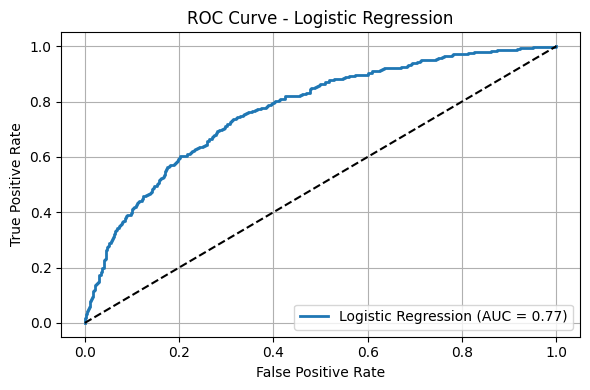



------ Random Forest ------
Accuracy      : 0.8630
Precision     : 0.7930
Recall        : 0.4423
F1 Score      : 0.5678
AUC (ROC)     : 0.8562
Confusion Matrix:
 [[1546   47]
 [ 227  180]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.79      0.44      0.57       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000



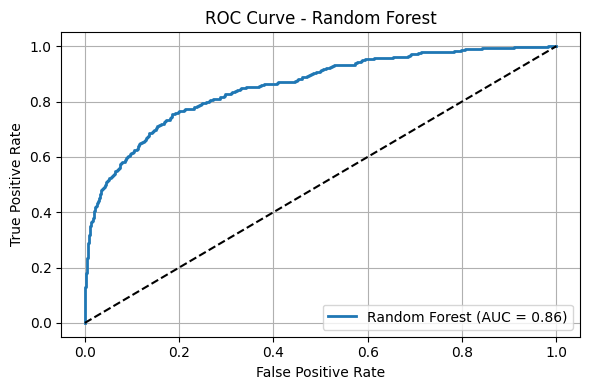



------ Gradient Boosting ------
Accuracy      : 0.8625
Precision     : 0.7538
Recall        : 0.4816
F1 Score      : 0.5877
AUC (ROC)     : 0.8518
Confusion Matrix:
 [[1529   64]
 [ 211  196]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.48      0.59       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



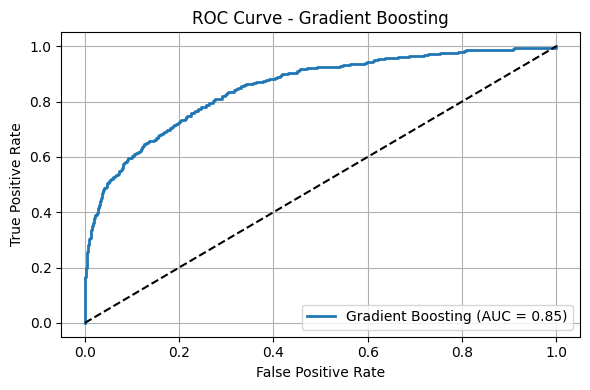



------ Support Vector Machine ------
Accuracy      : 0.8560
Precision     : 0.8362
Recall        : 0.3636
F1 Score      : 0.5068
AUC (ROC)     : 0.8218
Confusion Matrix:
 [[1564   29]
 [ 259  148]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.84      0.36      0.51       407

    accuracy                           0.86      2000
   macro avg       0.85      0.67      0.71      2000
weighted avg       0.85      0.86      0.83      2000



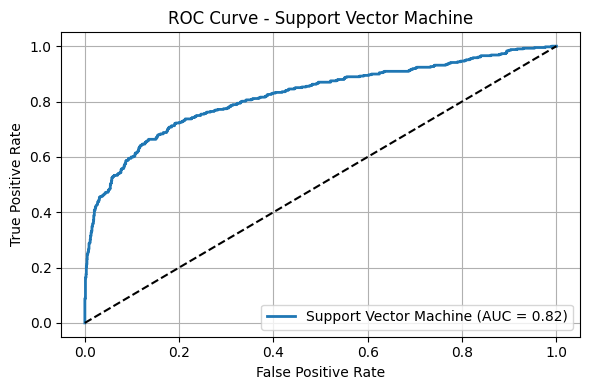



------ K-Nearest Neighbors ------
Accuracy      : 0.8370
Precision     : 0.6833
Recall        : 0.3710
F1 Score      : 0.4809
AUC (ROC)     : 0.7947
Confusion Matrix:
 [[1523   70]
 [ 256  151]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.90      1593
           1       0.68      0.37      0.48       407

    accuracy                           0.84      2000
   macro avg       0.77      0.66      0.69      2000
weighted avg       0.82      0.84      0.82      2000



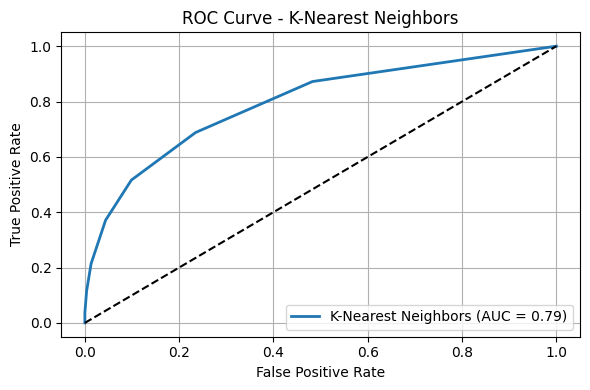



------ Decision Tree ------
Accuracy      : 0.8540
Precision     : 0.7861
Recall        : 0.3882
F1 Score      : 0.5197
AUC (ROC)     : 0.8378
Confusion Matrix:
 [[1550   43]
 [ 249  158]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1593
           1       0.79      0.39      0.52       407

    accuracy                           0.85      2000
   macro avg       0.82      0.68      0.72      2000
weighted avg       0.85      0.85      0.83      2000



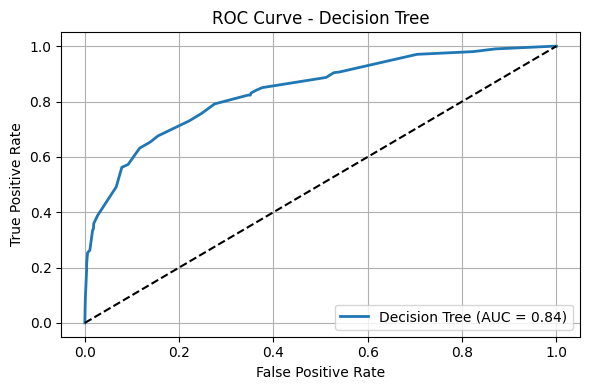



------ Naive Bayes ------
Accuracy      : 0.8290
Precision     : 0.7559
Recall        : 0.2359
F1 Score      : 0.3596
AUC (ROC)     : 0.8146
Confusion Matrix:
 [[1562   31]
 [ 311   96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90      1593
           1       0.76      0.24      0.36       407

    accuracy                           0.83      2000
   macro avg       0.79      0.61      0.63      2000
weighted avg       0.82      0.83      0.79      2000



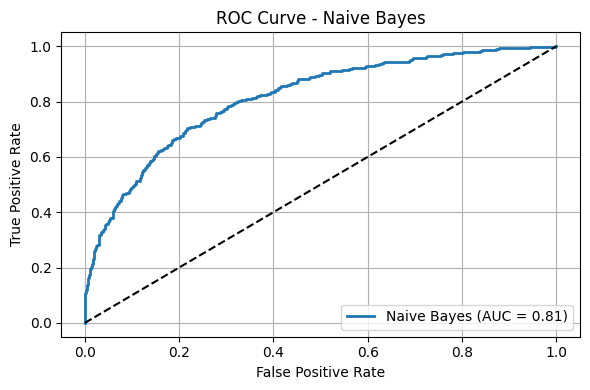

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:31:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)




------ XGBoost ------
Accuracy      : 0.8555
Precision     : 0.7169
Recall        : 0.4791
F1 Score      : 0.5744
AUC (ROC)     : 0.8452
Confusion Matrix:
 [[1516   77]
 [ 212  195]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.72      0.48      0.57       407

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.74      2000
weighted avg       0.84      0.86      0.84      2000



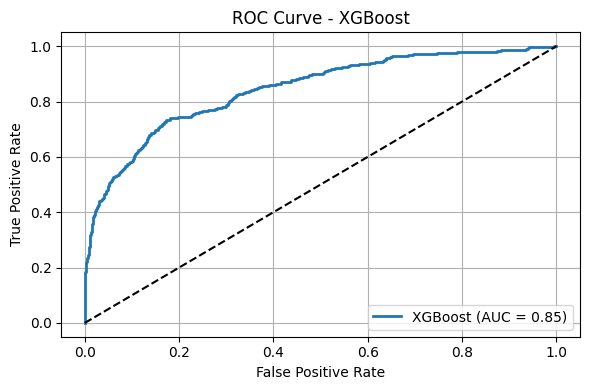

In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc, classification_report
)

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Step 2: Load Data
df = pd.read_csv('/content/Churn_Modelling.csv')

# Step 3: Drop Unnecessary Columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Step 4: Encode Categorical Variables
df['Geography'] = LabelEncoder().fit_transform(df['Geography'])
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Step 5: Feature and Target Separation
X = df.drop('Exited', axis=1)
y = df['Exited']

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 7: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Evaluation Function
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:  # For SVM without probability=True
        y_proba = model.decision_function(X_test)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    print(f"\n\n------ {model_name} ------")
    print(f"Accuracy      : {acc:.4f}")
    print(f"Precision     : {prec:.4f}")
    print(f"Recall        : {rec:.4f}")
    print(f"F1 Score      : {f1:.4f}")
    print(f"AUC (ROC)     : {roc_auc:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.tight_layout()
    plt.show()


# Step 9: Train and Evaluate All Models

# 1. Logistic Regression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
evaluate_model(lr, X_test, y_test, "Logistic Regression")

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=300, max_depth=12, random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test, "Random Forest")

# 3. Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.08, max_depth=5, random_state=42)
gb.fit(X_train, y_train)
evaluate_model(gb, X_test, y_test, "Gradient Boosting")

# 4. Support Vector Machine
svm = SVC(kernel='rbf', probability=True, C=1.0, random_state=42)
svm.fit(X_train, y_train)
evaluate_model(svm, X_test, y_test, "Support Vector Machine")

# 5. K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
evaluate_model(knn, X_test, y_test, "K-Nearest Neighbors")

# 6. Decision Tree
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test, "Decision Tree")

# 7. Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
evaluate_model(nb, X_test, y_test, "Naive Bayes")

# 8. XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model, X_test, y_test, "XGBoost")
